RainTomorrow is the target variable to predict. It means 
did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

https://github.com/pb111/Logistic-Regression-in-Python-Project/blob/master/Logistic%20Regression%20with%20Python%20and%20Scikit-Learn.ipynb




github link for code 

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package



kaggle link for data 

https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Info-graphs/Day%203.jpg
    
    for ppt 

In [308]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import pickle

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, ShuffleSplit

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve,log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
#from scikitplot.metrics import plot_precision_recall_curve
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

In [309]:
df=pd.read_csv("C:\\Users\\banke\\Desktop\\PYTHON\\supervised learning\\classification\\logistics reggression\\dataset in australia\\weatherAUS.csv",encoding= 'unicode_escape')

In [310]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [311]:
df.size

3345580

# 
first we will check for missing value 

In [312]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

step:2 
    we will check for data types of the data 

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# step 3 then we seprate the data in catagorical and interger 

In [314]:
categorical = []
for i in df.columns:
    if df[i].dtypes == 'O':
        categorical.append(i)

print('There are {} categorical variables:\n{}'.format(len(categorical), categorical))

There are 7 categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


view cata gorical head 

In [315]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


# summary of catagorical variable 

there is date coulmn
there are 6 categorical var are given and of which 
'Rain today ','Rain tomorrow ' they are binary variables 
and our target variable will rain will happen tomorrow 

# Explore the  categorical var 
missing value 

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


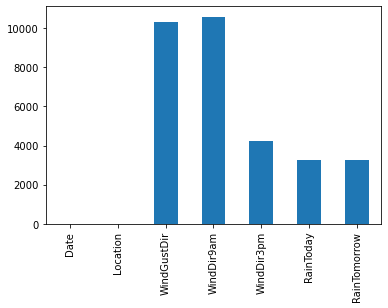

In [316]:
misscat=df[categorical].isnull().sum()
print(misscat)
print(misscat.plot.bar())

so ther are some missing values in that variable 

In [317]:
# finding column which has only misssing value 

In [318]:

#cat
cat1=[]
for i in df[categorical]:
    if df[i].isnull().sum()!=0:
        cat1.append(i)
print(df[cat1].isnull().sum())


#print(df[cat1].isnull().sum().plot.bar())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


 here we can see the catagorical columns which has missing values  

# frequency count 
how many times a value is repeted in the columns 
for perticular value ;-










print(df['Location'].value_counts()['Penrith'])

In [319]:
for i in df[categorical]:
    print(df[i].value_counts())

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009

# frequency distribution 
 by which propoerstion  frequency distribution in  categorical variable 
or we can say proportion of the total observations that each value represents.

by which percentage a value present in a variable .


It can be helpful for understanding the distribution of values in the categorical variables and identifying any potential imbalances in the data.

In [320]:
for i in df[categorical]:
    print(df[i].value_counts()/np.float(len(df)))

2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: Date, Length: 3436, dtype: float64
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.020686
Nuriootpa 

# Cardinality;number of labels 
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

***len(df['column_name '].unique())***
to find the unique value in perticular column 



In [321]:
# for checking in every column 
for i in df[categorical]:
    print(i, 'conatins',len(df[i].unique()),'labels')

Date conatins 3436 labels
Location conatins 49 labels
WindGustDir conatins 17 labels
WindDir9am conatins 17 labels
WindDir3pm conatins 17 labels
RainToday conatins 3 labels
RainTomorrow conatins 3 labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

# converting date in to numeric format 

In [322]:
df['Date'].info
#df['column'].dtypes

<bound method Series.info of 0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object>

In [323]:
# first we will cahnge the date from str to date format then we will change it in to 
#numeric format


changing into  date format 

In [324]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [325]:
# extract year from date 
df['year']=df['Date'].dt.year
df['year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int64

In [326]:
# extract month from date 
df['month']=df['Date'].dt.month
df['month'].head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [327]:
# extract day from date 
df['Day']=df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

now we can see have added yer,month,day column 
in the data se t now we can drop the date column 

In [329]:
df.drop('Date', axis=1, inplace = True)

In [330]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


 now we can see date column is replaced with year month day

now we are going to do the oprations on catagorical var we are 
going to change them in the dummy variable so that we can apply the models very easly 

In [331]:
categorical=[]
for i in df.columns:
    if df[i].dtypes=='O':
        categorical.append(i)
print(" there are {} categorical var".format(len(categorical)))
print('the categorical variables are :',categorical)

 there are 6 categorical var
the categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


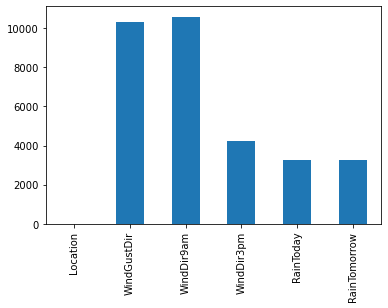

In [332]:
print(df[categorical].isnull().sum())
print(df[categorical].isnull().sum().plot.bar())

# we are going to mske the dummy vriable for each and every one 
data1=pd.get_dummies(df,columns= ['column_name ']) it will create data base with old plus dummy variable 




second method 



pd.get_dummies(df.Location,drop_first=True,dummy_na=True)

step 1 
we are going to take each and every variable one by one 

In [333]:
# variables or lables  
# checking the number of lables in Location 

len(df['Location'].unique())


#len(df.location.unique())
print('llocation contains',len(df['Location'].unique()),'lables')

llocation contains 49 lables


In [334]:
#what are the values of the location 

df['Location'].unique()



#df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [335]:
# check the frequency of lables 
df['Location'].value_counts()

#df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [336]:
# dummys of location 
pd.get_dummies(df.Location,drop_first=True,dummy_na=True)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,NaN
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [338]:
# to lnow the number of missing values in this 
pd.get_dummies(df['Location'],drop_first=True,dummy_na=True).sum(axis=0)


Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville          3040
Tuggeranong         3039


# WindGustDir var exploration 
 number of var or lables 

In [339]:
len(df['WindGustDir'].unique())
#len(df.WindGustDir.unique())
print('no of lables=',len(df.WindGustDir.unique()))

no of lables= 17


In [340]:
# what are the lables 
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [341]:
#check frequency of the lables in var in WindGustDir
df['WindGustDir'].value_counts()

#df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [342]:
# creating dummies
pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True)


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
145457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [343]:
# creating dummies
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category
pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

total missng value is 10326

# now we will make the dummies for the WindDir9am

#explotre  WindDir9am

step 1 
no labels 

In [344]:
x=len(df.WindDir9am.unique())
print('no of of values of unique lablees are =',x)

no of of values of unique lablees are = 17


step 2
what are the unique values 

In [345]:
df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

step-3
frequency no of times perticular value present 

In [346]:
df.WindDir9am.value_counts()
#df.WindDir9am.value_counts()['N'] for perticular value count

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

step3 creation of dummyies

In [347]:
pd.get_dummies(df.WindDir9am,drop_first=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


step4 
dummies with number of missing values 

In [348]:
pd.get_dummies(df.WindDir9am,drop_first=True,dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

no of missing value present in WindDir9am 10566

# creating dummies WindDir3pm

step 1 
unique labels   var in WindDir3pm

In [349]:
df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

step 2 
no of total labels 

In [350]:
len(df.WindDir3pm.unique())

17

step 3 
frequency distribuion or accurance of perticular variable or each and every variable 

In [351]:
df.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

step4 creating dummies 

In [352]:
pd.get_dummies(df.WindDir3pm,drop_first=True,dummy_na=True)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
145458,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


step 5 from dummies find how many missing values present in the WindDir3pm 
***by doing row wise sum we will get the total number of missing value***

In [353]:
pd.get_dummies(df.WindDir3pm,drop_first=True,dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

# creating dummy RainToday

step 1
number of lables or var in RainToday

In [354]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

stpe 2 
count of var lables 

In [355]:
len(df.RainToday.unique())

3

step 3
frequency distribution of variable 

In [356]:
df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

step 4 
get dummies 


In [357]:
pd.get_dummies(df.RainToday,drop_first=True,dummy_na=True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


step 5 
get the total number of missing values by adding rows 

In [358]:
pd.get_dummies(df.RainToday,drop_first=True,dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

total  number of missing values are 3261

# get the dummies in RainTomorrow 

step1 finding the lables 

In [359]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

step2 
total number of lables 

In [360]:
len(df.RainTomorrow.unique())

3

step 3 
frequency of lables 

In [361]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

step 4
creating dummies 

In [362]:
pd.get_dummies(df.RainTomorrow,drop_first=True,dummy_na=True)

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


step4
finding the total number of missing values 

In [363]:
pd.get_dummies(df.RainTomorrow,drop_first=True,dummy_na=True).sum(axis=0)


Yes    31877
NaN     3267
dtype: int64

#we got the missing values in RainTomorrow 3267

In [364]:
for i in categorical:
    if df[i].isnull().sum()>0: # where missing value is greater then 0
        print(i,df[i].isnull().mean())

WindGustDir 0.0709885879279527
WindDir9am 0.07263852605527293
WindDir3pm 0.02906641000962464
RainToday 0.022418534304963565
RainTomorrow 0.02245978275814657


In [365]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# filling missing value in categorical varaible
df.fillna(value=df['column_name'].mean())

In [366]:

df['WindGustDir'].fillna(value=df['WindGustDir'].mode()[0],inplace=True)

In [367]:
df['WindGustDir'].isnull().sum()

0

In [368]:
df['WindDir9am'].fillna(value=df['WindDir9am'].mode()[0],inplace=True)

In [369]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [370]:
df2=df['WindDir3pm'].fillna(value=df['WindDir3pm'].mode()[0],inplace=True)

In [371]:
df['RainToday'].fillna(value=df['RainToday'].mode()[0], inplace=True)

In [372]:
df['RainTomorrow'].fillna(value=df['RainTomorrow'].mode()[0],inplace=True)

In [373]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
year                 0
month                0
Day                  0
dtype: int64

# eploring the int and float value 


In [374]:
num=[]
for i in df:
    if df[i].dtype!='O':
        num.append(i)
print(num)
print(len(num))


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'Day']
19


In [375]:
df[num].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
Day                  0
dtype: int64

In [376]:
df[num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Cloud9am       89572 non-null   float64
 13  Cloud3pm       86102 non-null   float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  year           145460 non-null  int64  
 17  month          145460 non-nul

In [377]:
df[num].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


# checkiing for out layres 

first method is to find with help of the box plot 





step 1

In [378]:
df[num].describe()

#print(round(df[num].describe())) for rounf of we can take this 


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


By seeing this we can say where there is very big difference between mean and max then there will no need to check for the out layers

# step 2
by coparing the value of mean and median 


In [379]:
print(df[num].mean())
print(df[num].median())

MinTemp            12.194034
MaxTemp            23.221348
Rainfall            2.360918
Evaporation         5.468232
Sunshine            7.611178
WindGustSpeed      40.035230
WindSpeed9am       14.043426
WindSpeed3pm       18.662657
Humidity9am        68.880831
Humidity3pm        51.539116
Pressure9am      1017.649940
Pressure3pm      1015.255889
Cloud9am            4.447461
Cloud3pm            4.509930
Temp9am            16.990631
Temp3pm            21.683390
year             2012.769751
month               6.399615
Day                15.712258
dtype: float64
MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.4
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
year             2013.0
month               6.0
Da

<AxesSubplot:>

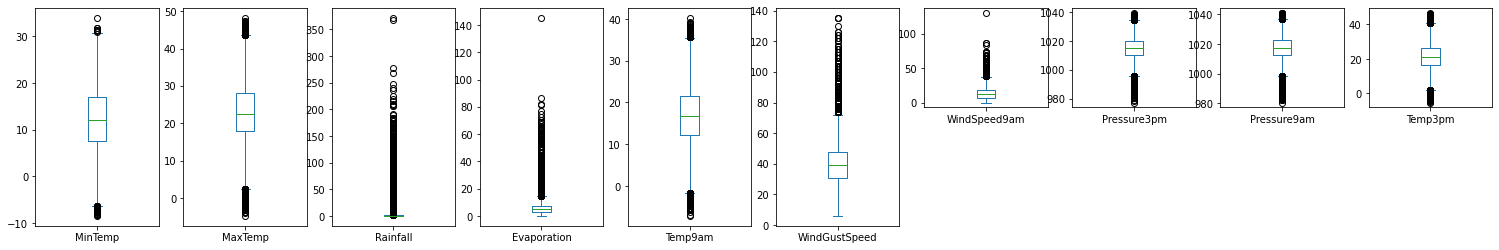

In [380]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,4))

plt.subplot(1,19,1)
df.MinTemp.plot(kind='box')

plt.subplot(1,19,2)
df.MaxTemp.plot(kind='box')


plt.subplot(1,19,3)
df.Rainfall.plot(kind='box')

plt.subplot(1,19,4)
df.Evaporation.plot(kind='box')

plt.subplot(1,19,5)
df.Temp9am   .plot(kind='box')

plt.subplot(1,19,6)
df.WindGustSpeed.plot(kind='box')

plt.subplot(2,19,7)
df.WindSpeed9am .plot(kind='box')

plt.subplot(2,19,8)
df.Pressure3pm.plot(kind='box')

plt.subplot(2,19,9)
df.Pressure9am.plot(kind='box')

plt.subplot(2,19,10)
df.Temp3pm.plot(kind='box')







# step 3 will check for distribution 
so that we can find the which method to use 



Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).
types of methods 




***1:IQR(Interquantile range) when it will not follow normal distribution 
The IQR is the range between the 25th and 75th percentiles of the data ***




****2:z score (mean ± 3*std)
Since for a normal distribution, about 99.7% of the data falls within the range ***

Text(0, 0.5, 'RainTomorrow')

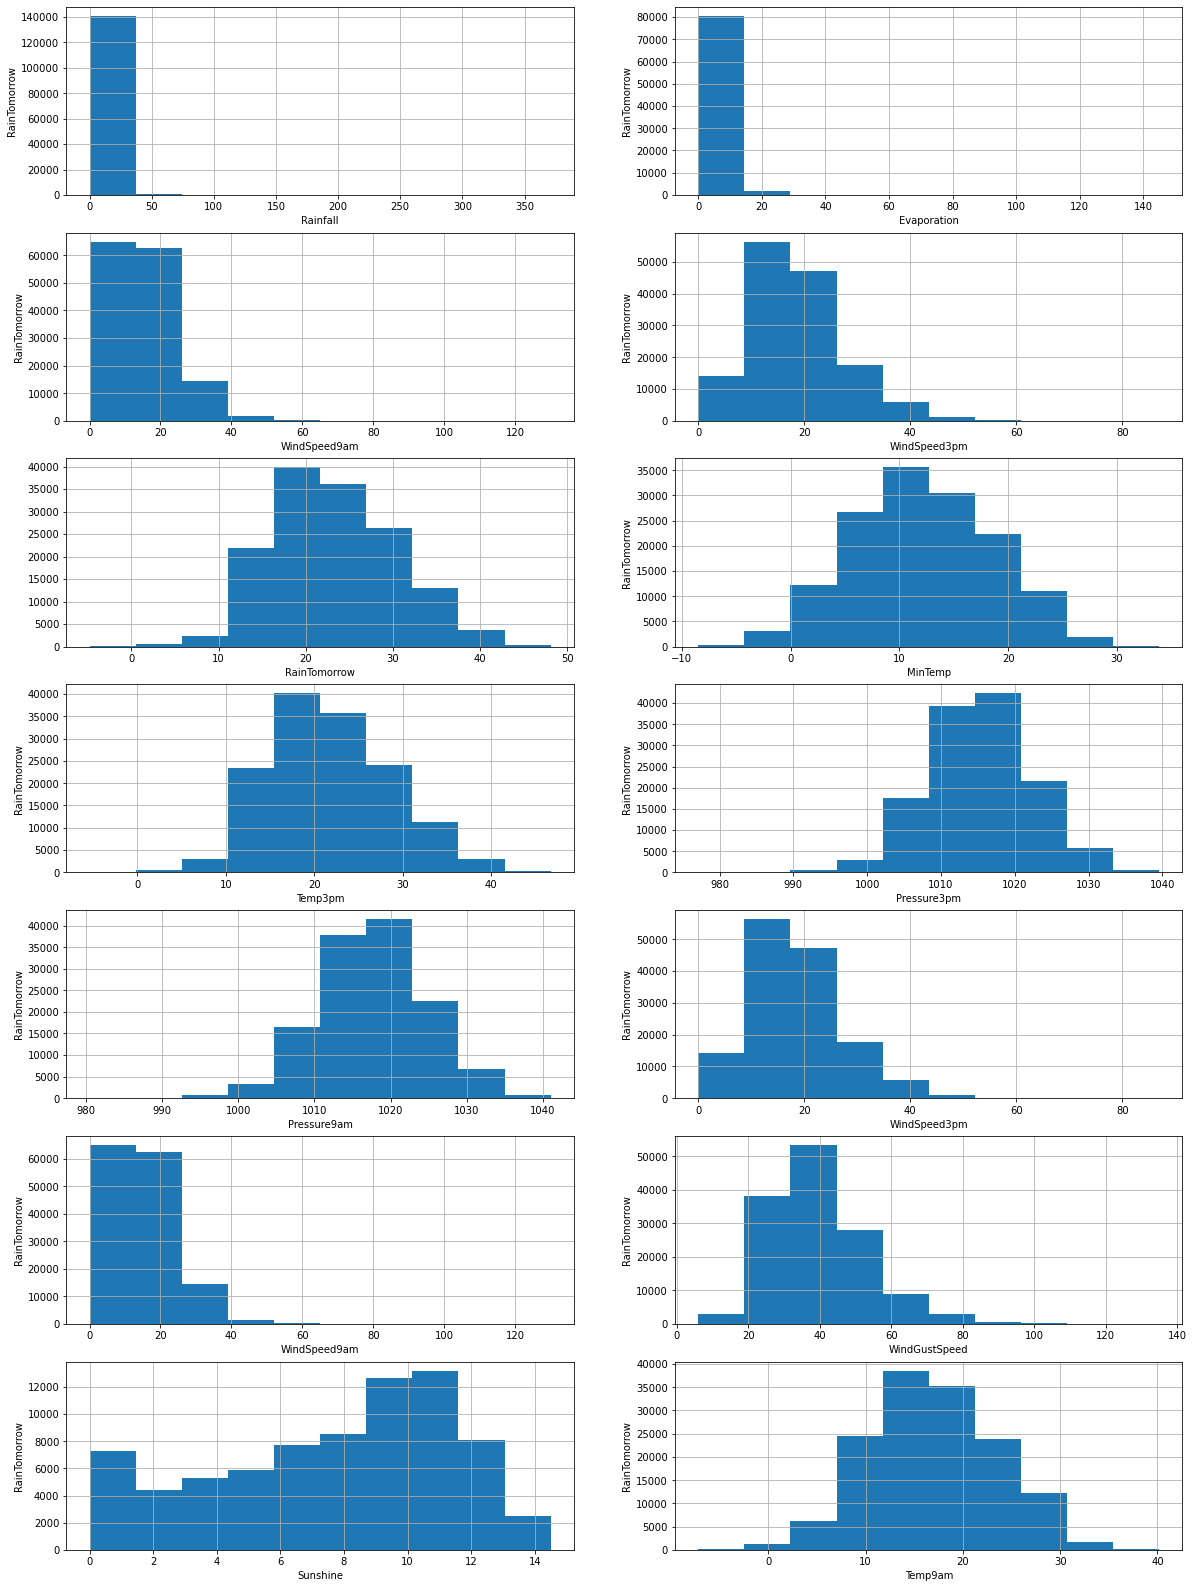

In [381]:
plt.figure(figsize=(20,45))


plt.subplot(11, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(11, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(11, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(11, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

plt.subplot(11,2,5)
fig=df.MaxTemp.hist(bins=10)
fig.set_xlabel('MaxTemp')
fig.set_xlabel('RainTomorrow')

plt.subplot(11,2,6)
fig=df.MinTemp.hist(bins=10)
fig.set_xlabel('MinTemp')
fig.set_ylabel('RainTomorrow')


plt.subplot(11,2,7)
fig=df.Temp3pm.hist(bins=10)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('RainTomorrow')


plt.subplot(11,2,8)
fig=df.Pressure3pm.hist(bins=10)
fig.set_xlabel('Pressure3pm')
fig.set_ylabel('RainTomorrow')



plt.subplot(11,2,9)
fig=df.Pressure9am.hist(bins=10)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('RainTomorrow')



plt.subplot(11,2,10)
fig=df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')



plt.subplot(11,2,11)
fig=df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')



plt.subplot(11,2,12)
fig=df.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')



plt.subplot(11,2,13)
fig=df.Sunshine.hist(bins=10)
fig.set_xlabel('Sunshine')
fig.set_ylabel('RainTomorrow')


plt.subplot(11,2,14)
fig=df.Temp9am.hist(bins=10)
fig.set_xlabel('Temp9am')
fig.set_ylabel('RainTomorrow')


            

some of the variables are skewed and some of them are normally distributed 
thtas why we use diffrent method for diffrent columns so thatw ecan find AS MUCH AS 
right value 

In [1]:
# find outlairs for rain fall variable 
IQR= df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
Lower_limit=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_limit=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(upper_limit)
print(Lower_limit)

NameError: name 'df' is not defined

In [383]:
df=df[(df['Rainfall']>Lower_limit)& (df['Rainfall']<upper_limit)]
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [384]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,120362.000000,120375.000000,120768.000000,69832.00000,63206.000000,112850.000000,119857.000000,118586.000000,119541.000000,117807.000000,108934.000000,108884.00000,74579.000000,71562.000000,120249.000000,118539.000000,120768.000000,120768.00000,120768.000000
mean,11.991752,23.742834,0.238249,5.70787,8.071762,39.096438,13.624895,18.363997,66.422524,48.593598,1018.254725,1015.64190,4.102562,4.227649,17.143406,22.203905,2012.771413,6.40163,15.696600
std,6.458591,7.097165,0.587140,4.21547,3.647407,13.086801,8.704125,8.635037,18.892994,20.011785,6.855751,6.87238,2.884254,2.730945,6.555143,6.906360,2.539536,3.44184,8.792825
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,983.700000,977.10000,0.000000,0.000000,-5.600000,-4.400000,2007.000000,1.00000,1.000000
25%,7.300000,18.500000,0.000000,2.80000,5.700000,30.000000,7.000000,13.000000,55.000000,34.000000,1013.600000,1010.90000,1.000000,1.000000,12.400000,17.100000,2011.000000,3.00000,8.000000
50%,11.800000,23.200000,0.000000,5.00000,9.000000,37.000000,13.000000,17.000000,67.000000,49.000000,1018.100000,1015.50000,4.000000,4.000000,16.900000,21.700000,2013.000000,6.00000,16.000000
75%,16.700000,28.800000,0.000000,7.60000,10.900000,46.000000,19.000000,24.000000,80.000000,62.000000,1022.900000,1020.30000,7.000000,7.000000,21.800000,26.900000,2015.000000,9.00000,23.000000
max,33.900000,48.100000,3.100000,86.20000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.60000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.00000,31.000000


In [385]:
df.size

3019200

<AxesSubplot:>

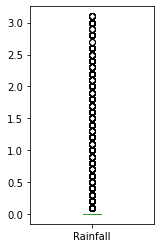

In [386]:
plt.figure(figsize=(50,4))
plt.subplot(1,19,3)
df.Rainfall.plot(kind='box')

In [387]:
# for Evaporation
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
Lowerlimit1=df.Evaporation.quantile(0.25)-(3*IQR)
upperlimit2=df.Evaporation.quantile(0.75)+(3*IQR)
print(Lowerlimit1)
print(upperlimit2)

-11.599999999999998
22.0


In [388]:
df=df[(df['Evaporation']>Lowerlimit1)&(df['Evaporation']<upperlimit2)]
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6051,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0,N,N,...,1011.6,NaN,1.0,NaN,32.7,No,No,2009,1,3
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143876,Katherine,15.0,32.0,0.0,9.6,NaN,E,35.0,SE,ESE,...,1012.1,0.0,NaN,21.8,NaN,No,No,2017,6,20
143877,Katherine,15.4,31.5,0.0,3.6,NaN,ESE,43.0,ESE,ESE,...,1012.7,0.0,NaN,21.6,NaN,No,No,2017,6,21
143878,Katherine,12.2,31.5,0.0,4.0,NaN,ESE,37.0,SE,ESE,...,1012.8,0.0,NaN,19.9,NaN,No,No,2017,6,22
143879,Katherine,14.9,31.5,0.0,6.4,NaN,ESE,41.0,SE,SE,...,1011.8,0.0,NaN,22.8,NaN,No,No,2017,6,23


In [389]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,69330.000000,69327.00000,69411.000000,69411.000000,59902.000000,65403.000000,69082.000000,68721.000000,68991.000000,68035.000000,69099.000000,69086.000000,61265.000000,58923.000000,69315.000000,68403.000000,69411.000000,69411.000000,69411.000000
mean,12.821080,24.32181,0.241074,5.542658,8.012374,39.509839,14.404736,18.928028,64.554783,47.245888,1018.004437,1015.372653,3.909035,4.082039,17.845019,22.773333,2012.368112,6.422512,15.712308
std,6.440406,7.01631,0.591909,3.524890,3.650445,12.878664,8.457039,8.363302,18.556618,19.738118,6.809588,6.851341,2.824593,2.676724,6.583011,6.823931,2.474173,3.421813,8.785605
min,-8.000000,4.10000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,977.100000,0.000000,0.000000,-1.200000,3.700000,2007.000000,1.000000,1.000000
25%,8.000000,18.80000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,54.000000,33.000000,1013.400000,1010.600000,1.000000,1.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.500000,23.80000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,66.000000,48.000000,1017.800000,1015.200000,4.000000,4.000000,17.400000,22.200000,2012.000000,6.000000,16.000000
75%,17.600000,29.60000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,61.000000,1022.600000,1020.000000,7.000000,7.000000,22.700000,27.800000,2014.000000,9.000000,23.000000
max,33.900000,47.30000,3.000000,21.800000,14.500000,135.000000,67.000000,76.000000,100.000000,100.000000,1040.900000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [390]:
df.size

1735275

<AxesSubplot:>

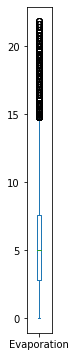

In [391]:
plt.figure(figsize=(10,6))
plt.subplot(1,19,4)
df.Evaporation.plot(kind='box')

In [392]:
# for WindSpeed9am
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
Lowerlimit2=df.WindSpeed9am.quantile(0.25)-(3*IQR)
upperlimit3=df.WindSpeed9am.quantile(0.75)+(3*IQR)
print(Lowerlimit2)
print(upperlimit3)

-21.0
49.0


In [393]:
df=df[(df['WindSpeed9am']>Lowerlimit2) & (df['WindSpeed9am']<upperlimit3)]
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,Day
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1,2
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1,4
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1,5
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143876,Katherine,15.0,32.0,0.0,9.6,NaN,E,35.0,SE,ESE,...,1012.1,0.0,NaN,21.8,NaN,No,No,2017,6,20
143877,Katherine,15.4,31.5,0.0,3.6,NaN,ESE,43.0,ESE,ESE,...,1012.7,0.0,NaN,21.6,NaN,No,No,2017,6,21
143878,Katherine,12.2,31.5,0.0,4.0,NaN,ESE,37.0,SE,ESE,...,1012.8,0.0,NaN,19.9,NaN,No,No,2017,6,22
143879,Katherine,14.9,31.5,0.0,6.4,NaN,ESE,41.0,SE,SE,...,1011.8,0.0,NaN,22.8,NaN,No,No,2017,6,23


In [394]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,68866.000000,68846.000000,68924.000000,68924.000000,59649.000000,65194.000000,68924.000000,68494.000000,68542.000000,67569.000000,68827.000000,68794.000000,61017.000000,58671.000000,68862.000000,67934.000000,68924.000000,68924.000000,68924.000000
mean,12.834631,24.327028,0.241414,5.536854,8.016349,39.415376,14.314361,18.884501,64.585451,47.289630,1018.015552,1015.383867,3.906960,4.079034,17.855142,22.777843,2012.376922,6.417953,15.717558
std,6.442569,7.013898,0.592338,3.523600,3.650788,12.730961,8.250751,8.300433,18.558425,19.734974,6.801240,6.843997,2.824881,2.676924,6.585920,6.820741,2.472027,3.420378,8.785981
min,-8.000000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,977.100000,0.000000,0.000000,-1.200000,3.700000,2007.000000,1.000000,1.000000
25%,8.000000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,54.000000,33.000000,1013.400000,1010.600000,1.000000,1.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.500000,23.800000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,66.000000,48.000000,1017.900000,1015.200000,4.000000,4.000000,17.400000,22.200000,2012.000000,6.000000,16.000000
75%,17.600000,29.600000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,61.000000,1022.600000,1020.000000,7.000000,7.000000,22.800000,27.800000,2014.000000,9.000000,23.000000
max,33.900000,47.300000,3.000000,21.800000,14.500000,135.000000,48.000000,67.000000,100.000000,100.000000,1040.900000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [395]:
df.size

1723100

<AxesSubplot:>

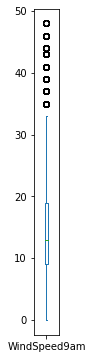

In [396]:
plt.figure(figsize=(10,6))
plt.subplot(1,19,4)
df.WindSpeed9am.plot(kind='box')

In [397]:
#WindSpeed3pm
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lowerlimit4=df.WindSpeed3pm.quantile(0.25)-(3*IQR)
upperlimit5=df.WindSpeed3pm.quantile(0.75)+(3*IQR)
print(lowerlimit4)
print(upperlimit5)

-20.0
57.0


In [398]:
df=df[(df['WindSpeed3pm']>lowerlimit4)&(df['WindSpeed3pm']<upperlimit5)]

In [399]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,68416.000000,68410.000000,68473.000000,68473.000000,59388.000000,65135.000000,68473.00000,68473.000000,68095.000000,67509.000000,68379.000000,68393.000000,60579.000000,58611.000000,68411.000000,67873.000000,68473.000000,68473.000000,68473.000000
mean,12.831960,24.344150,0.240949,5.538954,8.020922,39.398234,14.32331,18.871555,64.525575,47.290954,1018.011353,1015.378734,3.900362,4.078842,17.859514,22.777719,2012.360872,6.414163,15.719057
std,6.454614,7.021905,0.591830,3.523579,3.648979,12.689976,8.23557,8.268510,18.561740,19.734298,6.800562,6.843481,2.824504,2.677039,6.597539,6.821503,2.466326,3.418599,8.784907
min,-8.000000,4.100000,0.000000,0.000000,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,983.700000,977.100000,0.000000,0.000000,-1.200000,3.700000,2007.000000,1.000000,1.000000
25%,8.000000,18.800000,0.000000,2.800000,5.600000,31.000000,9.00000,13.000000,54.000000,33.000000,1013.400000,1010.600000,1.000000,1.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.500000,23.800000,0.000000,5.000000,9.000000,37.000000,13.00000,19.000000,66.000000,48.000000,1017.900000,1015.200000,4.000000,4.000000,17.400000,22.200000,2012.000000,6.000000,16.000000
75%,17.600000,29.700000,0.000000,7.600000,10.800000,46.000000,19.00000,24.000000,77.000000,61.000000,1022.600000,1020.000000,7.000000,7.000000,22.800000,27.800000,2014.000000,9.000000,23.000000
max,33.900000,47.300000,3.000000,21.800000,14.500000,130.000000,48.00000,56.000000,100.000000,100.000000,1040.900000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


In [400]:
df.size

1711825

<AxesSubplot:>

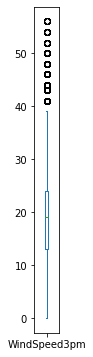

In [401]:
plt.figure(figsize=(10,6))
plt.subplot(1,19,4)
df.WindSpeed3pm.plot(kind='box')

In [402]:
#WindGustSpeed
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lowerlimit8=df.WindGustSpeed.quantile(0.25)-(3*IQR)
upperlimit9=df.WindGustSpeed.quantile(0.75)+(3*IQR)
print(lowerlimit8)
print(upperlimit9)

-14.0
91.0


In [403]:
df=df[(df['WindGustSpeed']>lowerlimit8)&(df['WindGustSpeed']<upperlimit9)]

In [404]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,64915.000000,64919.000000,64949.000000,64949.000000,56052.000000,64949.000000,64949.000000,64949.000000,64579.000000,64007.000000,64880.000000,64892.000000,57160.000000,55225.000000,64891.000000,64364.000000,64949.00000,64949.000000,64949.000000
mean,12.803355,24.459317,0.238119,5.577655,8.058269,39.232475,14.384163,18.833208,64.311835,46.694018,1018.021641,1015.373599,3.870591,4.064174,17.892343,22.903879,2012.42267,6.417266,15.714006
std,6.526790,7.089200,0.588313,3.551889,3.650342,12.318316,8.175078,8.172735,18.710816,19.668266,6.760617,6.805708,2.823604,2.675319,6.671350,6.889463,2.45983,3.415416,8.783062
min,-6.900000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,980.200000,0.000000,0.000000,-1.000000,3.700000,2007.00000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.400000,1010.600000,1.000000,1.000000,12.800000,17.500000,2010.00000,3.000000,8.000000
50%,12.500000,24.100000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.800000,1015.200000,4.000000,4.000000,17.400000,22.500000,2012.00000,6.000000,16.000000
75%,17.700000,29.900000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.500000,1020.000000,7.000000,7.000000,22.900000,28.000000,2014.00000,9.000000,23.000000
max,33.900000,47.300000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.00000,12.000000,31.000000


In [405]:
df.size

1623725

# for rest of them we will use zscore method(mean+-3*std)
because it is following normal distribution 

In [406]:
# MinTemp
upperlimit11=df.MinTemp.mean()+(3*(df.MinTemp.std()))
lowerlimit12=df.MinTemp.mean()-(3*(df.MinTemp.std()))
print(upperlimit11)
print(lowerlimit12)

32.383725940671084
-6.777015627184543


In [407]:
df=df[(df['MinTemp']>lowerlimit12)&(df['MinTemp']<upperlimit11)]

In [408]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,64913.000000,64883.000000,64913.000000,64913.000000,56027.000000,64913.000000,64913.000000,64913.000000,64546.000000,63974.000000,64846.000000,64857.000000,57130.000000,55198.000000,64857.000000,64329.000000,64913.000000,64913.000000,64913.000000
mean,12.803334,24.457727,0.238097,5.577122,8.058324,39.231494,14.384669,18.833700,64.311266,46.694126,1018.022072,1015.373921,3.870628,4.063915,17.891606,22.902310,2012.422997,6.418483,15.712199
std,6.525907,7.087750,0.588307,3.551423,3.650380,12.318305,8.174907,8.172684,18.709248,19.666814,6.760589,6.805548,2.823667,2.675337,6.670408,6.887879,2.459655,3.415380,8.782326
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,980.200000,0.000000,0.000000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.400000,1010.600000,1.000000,1.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.500000,24.100000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.800000,1015.200000,4.000000,4.000000,17.400000,22.500000,2012.000000,6.000000,16.000000
75%,17.700000,29.900000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.500000,1020.000000,7.000000,7.000000,22.900000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,47.300000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,2017.000000,12.000000,31.000000


<AxesSubplot:>

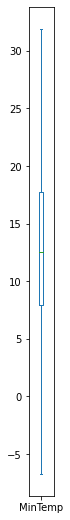

In [409]:
plt.figure(figsize=(10,9))
plt.subplot(1,19,4)
df.MinTemp.plot(kind='box')

In [410]:
#MaxTemp
upperlimit13=df.MaxTemp.mean()+(3*(df.MaxTemp.std()))
lowerlimit14=df.MaxTemp.mean()-(3*(df.MaxTemp.std()))
print(upperlimit13)
print(lowerlimit14)

45.720976597737085
3.1944773732565395


In [411]:
df=df[(df['MaxTemp']>lowerlimit14)&(df['MaxTemp']<upperlimit13)]

In [412]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,64870.000000,64870.000000,64870.000000,64870.000000,56014.000000,64870.000000,64870.000000,64870.000000,64505.000000,63953.000000,64803.000000,64815.000000,57088.000000,55175.000000,64815.000000,64306.000000,64870.000000,64870.000000,64870.000000
mean,12.797281,24.453337,0.238243,5.574847,8.057768,39.229074,14.385772,18.834346,64.316177,46.701703,1018.026794,1015.379477,3.871427,4.064214,17.884649,22.896095,2012.421397,6.419886,15.713088
std,6.522531,7.081671,0.588472,3.549565,3.650551,12.316166,8.175375,8.173316,18.706946,19.661169,6.759218,6.803199,2.823748,2.675478,6.665979,6.880248,2.458977,3.415028,8.782242
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,980.200000,0.000000,0.000000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.400000,1010.600000,1.000000,1.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.500000,24.100000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.800000,1015.200000,4.000000,4.000000,17.400000,22.500000,2012.000000,6.000000,16.000000
75%,17.700000,29.900000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.600000,1020.000000,7.000000,7.000000,22.900000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,45.700000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,44.400000,2017.000000,12.000000,31.000000


<AxesSubplot:>

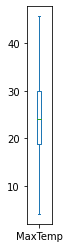

In [413]:
plt.figure(figsize=(10,4))
plt.subplot(1,19,4)
df.MaxTemp.plot(kind='box')

In [414]:
#Temp3pm
upperlimit15=df.Temp3pm.mean()+(3*(df.Temp3pm.std()))
lowerlimit16=df.Temp3pm.mean()-(3*(df.Temp3pm.std()))
print(upperlimit15)
print(lowerlimit16)

43.53684056806861
2.2553498962738914


In [415]:
df=df[(df['Temp3pm']>lowerlimit16)&(df['Temp3pm']<upperlimit15)]

In [416]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,64295.000000,64295.000000,64295.000000,64295.000000,55982.000000,64295.000000,64295.000000,64295.000000,63937.000000,63942.000000,64229.000000,64248.000000,56523.000000,55152.000000,64246.000000,64295.000000,64295.000000,64295.000000,64295.000000
mean,12.729474,24.358978,0.239244,5.558124,8.058035,39.237592,14.404510,18.857314,64.356711,46.708345,1018.065832,1015.433545,3.886400,4.063824,17.804041,22.892497,2012.392612,6.417886,15.715437
std,6.492996,7.030576,0.589432,3.551930,3.649860,12.340491,8.190324,8.186393,18.723160,19.656313,6.767991,6.800809,2.821562,2.675337,6.626808,6.875334,2.447541,3.416378,8.784408
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,980.200000,0.000000,0.000000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.500000,1010.700000,1.000000,1.000000,12.700000,17.500000,2010.000000,3.000000,8.000000
50%,12.400000,24.000000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.900000,1015.300000,4.000000,4.000000,17.300000,22.500000,2012.000000,6.000000,16.000000
75%,17.600000,29.700000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.600000,1020.000000,7.000000,7.000000,22.800000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,45.500000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,43.400000,2017.000000,12.000000,31.000000


In [417]:
df.size

1607375

<AxesSubplot:>

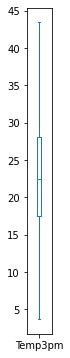

In [418]:
plt.figure(figsize=(10,6))
plt.subplot(1,19,4)
df.Temp3pm.plot(kind='box')

In [419]:
#Temp9am
upperlimit17=df.Temp9am.mean()+(3*(df.Temp9am.std()))
lowerlimit18=df.Temp9am.mean()-(3*(df.Temp9am.std()))
print(upperlimit17)
print(lowerlimit18)

37.68446438263604
-2.076382945659244


In [420]:
df=df[(df['Temp9am']>lowerlimit18)&(df['Temp9am']<upperlimit17)]

In [421]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,64237.000000,64237.000000,64237.000000,64237.000000,55930.000000,64237.000000,64237.000000,64237.000000,63928.000000,63886.000000,64173.000000,64190.000000,56474.000000,55101.00000,64237.000000,64237.000000,64237.000000,64237.000000,64237.000000
mean,12.730459,24.360018,0.239049,5.558771,8.059564,39.241092,14.405187,18.859707,64.363941,46.699058,1018.066282,1015.433744,3.885310,4.06303,17.801147,22.893700,2012.393480,6.418419,15.716690
std,6.491898,7.027232,0.589179,3.550321,3.649242,12.338493,8.190684,8.186123,18.714463,19.647682,6.765805,6.799005,2.821181,2.67533,6.622757,6.872819,2.447895,3.416297,8.784086
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,983.700000,980.200000,0.000000,0.00000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.600000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.500000,1010.700000,1.000000,1.00000,12.700000,17.500000,2010.000000,3.000000,8.000000
50%,12.400000,24.000000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.900000,1015.300000,4.000000,4.00000,17.300000,22.500000,2012.000000,6.000000,16.000000
75%,17.600000,29.700000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.600000,1020.000000,7.000000,7.00000,22.800000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,45.500000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.00000,37.600000,43.400000,2017.000000,12.000000,31.000000


In [422]:
df.size

1605925

<AxesSubplot:>

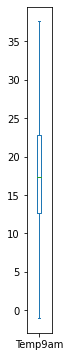

In [423]:
plt.figure(figsize=(10,6))
plt.subplot(1,19,10)
df.Temp9am.plot(kind='box')

In [424]:
#Pressure3pm
upperlimit19=df.Pressure3pm.mean()+(3*(df.Pressure3pm.std()))
lowerlimit20=df.Pressure3pm.mean()-(3*(df.Pressure3pm.std()))
print(upperlimit19)
print(lowerlimit20)

1035.8307584823988
995.0367286651225


In [425]:
df=df[(df['Pressure3pm']>lowerlimit20)&(df['Pressure3pm']<upperlimit19)]

In [426]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,63984.000000,63984.000000,63984.000000,63984.000000,55710.000000,63984.000000,63984.000000,63984.000000,63678.000000,63636.000000,63949.000000,63984.000000,56284.000000,54915.000000,63984.000000,63984.000000,63984.000000,63984.000000,63984.000000
mean,12.740848,24.379351,0.237606,5.563714,8.071100,39.180983,14.393505,18.844164,64.351597,46.671350,1018.106100,1015.475141,3.879717,4.058527,17.815446,22.914547,2012.395474,6.416026,15.711318
std,6.494625,7.022884,0.587367,3.552239,3.646472,12.263596,8.183301,8.173460,18.722626,19.644781,6.655676,6.680530,2.820494,2.675136,6.623281,6.866582,2.447035,3.416534,8.785648
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,989.600000,995.100000,0.000000,0.000000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.700000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.500000,1010.700000,1.000000,1.000000,12.700000,17.500000,2010.000000,3.000000,8.000000
50%,12.400000,24.000000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.900000,1015.300000,4.000000,4.000000,17.300000,22.500000,2012.000000,6.000000,16.000000
75%,17.600000,29.800000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.600000,1020.000000,7.000000,7.000000,22.800000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,45.500000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1039.500000,1035.800000,8.000000,9.000000,37.600000,43.400000,2017.000000,12.000000,31.000000


In [427]:
df.size

1599600

In [428]:
#Pressure9am
upperlimit21=df.Pressure9am.mean()+(3*(df.Pressure9am.std()))
lowerlimit22=df.Pressure9am.mean()-(3*(df.Pressure9am.std()))
print(upperlimit21)
print(lowerlimit22)

1038.0731284359078
998.1390719112615


In [429]:
df=df[(df['Pressure9am']>lowerlimit22)&(df['Pressure9am']<upperlimit21)]

In [430]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,63833.000000,63833.000000,63833.000000,63833.000000,55582.000000,63833.000000,63833.000000,63833.000000,63527.000000,63486.000000,63833.000000,63833.000000,56161.000000,54796.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000
mean,12.745274,24.390632,0.236675,5.564418,8.075136,39.145442,14.381323,18.833440,64.349788,46.656995,1018.131783,1015.495728,3.877317,4.056555,17.822404,22.927649,2012.395798,6.416023,15.707847
std,6.496290,7.020727,0.586167,3.552389,3.645946,12.222776,8.173853,8.161115,18.725364,19.644324,6.597440,6.641358,2.820612,2.675038,6.623249,6.863410,2.447030,3.416502,8.785419
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,998.200000,995.100000,0.000000,0.000000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,5.700000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.600000,1010.800000,1.000000,1.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.400000,24.000000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.900000,1015.300000,4.000000,4.000000,17.300000,22.500000,2012.000000,6.000000,16.000000
75%,17.600000,29.800000,0.000000,7.600000,10.800000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.600000,1020.000000,7.000000,7.000000,22.800000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,45.500000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1038.000000,1035.800000,8.000000,9.000000,37.600000,43.400000,2017.000000,12.000000,31.000000


In [431]:
df.size

1595825

In [433]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
year               int64
month              int64
Day                int64
dtype: object

# missing values in numrical variable 

In [434]:
df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine         8251
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am       306
Humidity3pm       347
Pressure9am         0
Pressure3pm         0
Cloud9am         7672
Cloud3pm         9037
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
year                0
month               0
Day                 0
dtype: int64

In [435]:
# by visualizing above we can see there are missing value 
#in float and int not in categoricaln data

# Assumption

i assume that our data is missing completly random (MCAR)

As we know there are two methods by which we can fill the missing value with 



1: Filling mean and median and our data has some oulaires then we should use the median (they are also called as mean and median imputation)




2:And other method is Random sample imputation 


In [436]:
for i in df:
    if df[i].dtypes!='O':
        df[i].fillna(df[i].median(),inplace=True)

In [438]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
Day              0
dtype: int64

In [439]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,Day
count,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000,63833.000000
mean,12.745274,24.390632,0.236675,5.564418,8.194683,39.145442,14.381323,18.833440,64.352905,46.658860,1018.131783,1015.495728,3.892062,4.048549,17.822404,22.927649,2012.395798,6.416023,15.707847
std,6.496290,7.020727,0.586167,3.552389,3.416276,12.222776,8.173853,8.161115,18.680481,19.590873,6.597440,6.641358,2.645983,2.478535,6.623249,6.863410,2.447030,3.416502,8.785419
min,-6.700000,4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,998.200000,995.100000,0.000000,0.000000,-1.000000,3.700000,2007.000000,1.000000,1.000000
25%,7.900000,18.800000,0.000000,2.800000,6.300000,31.000000,9.000000,13.000000,53.000000,32.000000,1013.600000,1010.800000,1.000000,2.000000,12.800000,17.500000,2010.000000,3.000000,8.000000
50%,12.400000,24.000000,0.000000,5.000000,9.000000,37.000000,13.000000,19.000000,65.000000,47.000000,1017.900000,1015.300000,4.000000,4.000000,17.300000,22.500000,2012.000000,6.000000,16.000000
75%,17.600000,29.800000,0.000000,7.600000,10.600000,46.000000,19.000000,24.000000,77.000000,60.000000,1022.600000,1020.000000,7.000000,7.000000,22.800000,28.000000,2014.000000,9.000000,23.000000
max,31.900000,45.500000,3.000000,21.800000,14.500000,89.000000,48.000000,56.000000,100.000000,100.000000,1038.000000,1035.800000,8.000000,9.000000,37.600000,43.400000,2017.000000,12.000000,31.000000


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63833 entries, 6049 to 143186
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       63833 non-null  object 
 1   MinTemp        63833 non-null  float64
 2   MaxTemp        63833 non-null  float64
 3   Rainfall       63833 non-null  float64
 4   Evaporation    63833 non-null  float64
 5   Sunshine       63833 non-null  float64
 6   WindGustDir    63833 non-null  object 
 7   WindGustSpeed  63833 non-null  float64
 8   WindDir9am     63833 non-null  object 
 9   WindDir3pm     63833 non-null  object 
 10  WindSpeed9am   63833 non-null  float64
 11  WindSpeed3pm   63833 non-null  float64
 12  Humidity9am    63833 non-null  float64
 13  Humidity3pm    63833 non-null  float64
 14  Pressure9am    63833 non-null  float64
 15  Pressure3pm    63833 non-null  float64
 16  Cloud9am       63833 non-null  float64
 17  Cloud3pm       63833 non-null  float64
 18  Te

In [441]:
df2=pd.get_dummies(df,columns=['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',])
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,1,0,0,0,1,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,1,0,0,0,0,0,1,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,1,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,1,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143181,18.2,35.5,0.0,5.0,9.0,41.0,4.0,22.0,65.0,27.0,...,0,0,0,0,0,0,0,0,1,0
143182,22.6,33.6,0.0,8.0,9.0,46.0,17.0,26.0,53.0,40.0,...,0,0,0,0,0,0,0,0,1,0
143183,17.4,30.7,0.0,10.8,9.0,46.0,22.0,19.0,28.0,42.0,...,0,1,0,0,0,0,0,0,1,0
143185,13.3,32.0,0.0,5.8,9.0,43.0,15.0,22.0,73.0,28.0,...,0,0,0,0,0,0,0,0,1,0


In [134]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [443]:
x=df2.drop(['RainTomorrow'],axis=1)
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,1,0,0,0,1,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,1,0,0,0,0,0,1,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,1,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,1,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143181,18.2,35.5,0.0,5.0,9.0,41.0,4.0,22.0,65.0,27.0,...,0,0,0,0,0,0,0,0,1,0
143182,22.6,33.6,0.0,8.0,9.0,46.0,17.0,26.0,53.0,40.0,...,0,0,0,0,0,0,0,0,1,0
143183,17.4,30.7,0.0,10.8,9.0,46.0,22.0,19.0,28.0,42.0,...,0,1,0,0,0,0,0,0,1,0
143185,13.3,32.0,0.0,5.8,9.0,43.0,15.0,22.0,73.0,28.0,...,0,0,0,0,0,0,0,0,1,0


In [444]:
y=df2['RainTomorrow']
y
#[[]] here because we are providing two values to the y 

6049      No
6050      No
6052      No
6053      No
6054      No
          ..
143181    No
143182    No
143183    No
143185    No
143186    No
Name: RainTomorrow, Length: 63833, dtype: object

In [445]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,1,0,0,0,1,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,1,0,0,0,0,0,1,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,1,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,1,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143181,18.2,35.5,0.0,5.0,9.0,41.0,4.0,22.0,65.0,27.0,...,0,0,0,0,0,0,0,0,1,0
143182,22.6,33.6,0.0,8.0,9.0,46.0,17.0,26.0,53.0,40.0,...,0,0,0,0,0,0,0,0,1,0
143183,17.4,30.7,0.0,10.8,9.0,46.0,22.0,19.0,28.0,42.0,...,0,1,0,0,0,0,0,0,1,0
143185,13.3,32.0,0.0,5.8,9.0,43.0,15.0,22.0,73.0,28.0,...,0,0,0,0,0,0,0,0,1,0


# spliting the model in train and test 



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




here random_state=42 represents it should not be random  

In [446]:
from sklearn.model_selection import train_test_split
#split the variables with an 80,20 and some random satate

In [447]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model training  

In [448]:
from sklearn.linear_model import LogisticRegression


Initiate the model and fitting 

In [467]:
logreg=LogisticRegression(C=1,solver='liblinear',random_state=0)

#fitting the model 
logreg.fit(x_train,y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

# Predict results
for that we will apply the model on x_test then we will get the y_predict_test

In [568]:
y_pred_test=logreg.predict(x_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [572]:
# to know the which prediction is more 

np.unique(y_pred_test, return_counts=True)

#chances of rain will not happen is more 

(array(['No', 'Yes'], dtype=object), array([11558,  1209], dtype=int64))

# Check acuuracy score 
***we will compare y_test with the y_pred_test****

# 1:-x_test or model accuracy 

In [573]:
from sklearn.metrics import accuracy_score

In [574]:
print('model accuracy={0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))

model accuracy=0.8765


# Assumptions and matrics

# check for over fitting 

now i will compare x_train and x_test accuracy to check for the over fitting

In [575]:
y_pred_train=logreg.predict(x_train)
y_pred_train

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [576]:
print('training set accuracy score :{0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

training set accuracy score :0.8771


print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))
it is the other method to calculate the accuracy which is also called as logreg.score

# From comparing both the accuracies we can say that this model is not 
over fit because
****the condition of overr fit model is that 
it has 100% or far more then the accuracy of testing data 
which is not applied here so we can say this model is not over fit********

***low error in trainig model but high error in testing model ****



***also we can say our model is not under fit because our model did not have low traning and low testing accuracy ****

# when model is underfitt then can use C hyperparameter
In logistic regression, C is a hyperparameter that controls the regularization strength of the model. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function of the model.

The C parameter in logistic regression determines the inverse of the regularization strength, where smaller values of C lead to stronger regularization and larger values of C lead to weaker regularization. In other words, a smaller C value will result in a more generalized model with a smoother decision boundary, while a larger C value will result in a more complex model that can potentially overfit the data.

The value of C can be tuned during model training using techniques like cross-validation to find the optimal value that balances between underfitting and overfitting. Choosing the right value of C depends on the specific problem, the amount of available data, and the complexity of the model.

In [577]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(x_train, y_train)
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(x_test, y_test)))

Training set score: 0.8765
Test set score: 0.8762


this is optional when model is over or underfit 

# Compare model accuracy with null accuracy
***we can achive the null accuracy by predicting the most frequent class 
for example in yes and no which comes more times if we will go with that ****

In [578]:
# we will check value counts 
y_test.value_counts()

No     10715
Yes     2052
Name: RainTomorrow, dtype: int64

we can see here that no is more frequent then yes then we calculate the null fre
quency of no 

In [579]:
y_test.size

12767

In [580]:
# null accuracy score 
null_accuracy=(10715/12767)
print('null acuracy:{0:0.4f}'.format(null_accuracy))

null acuracy:0.8393


 we can see that model accuracyis 0.8765 and null_accuracy is 0.8393
so we know that If the model's performance is better than the null accuracy, it means that the model is doing better than just predicting the most frequent class.

# confusion matrics 
it summrizes our performance and also give us the idea that how many predicted 
values are coreect and  incorrect  our model and gives us in the tabulr form  

in this matrics we draw a table between predicted results and 
actual results and compare them 



 ***True positive***:- when our predicted result and actual results both are present in positve class like both results are predicting a person got an heart attack  then it is called truepostitve .

**True negative*** :- when our actual results and predicted results both are in smae class 
    and  both are saying that he diddnt get an heart attack 

 ***False positive***:- when our actual is negative and our predicted is positive then it is called false positive and it is a ***type 1 error***

***False negative***:- when our actual is positve and our predictions are saying that it is negative then it is False negative 
eg:prediction not an heart attack and actual heart attck so it is very lethtal and this type of error is called ***type 2 error ***

In [581]:
# print the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print('confusion matrics\n',cm)
print('true positive(TP)=',cm[0,0])
print('true negative (TN)=',cm[1,1])
print('false positve(FP)=',cm[0,1],'type 1 error ')
print('false negative(FN)=',cm[1,0],'type 2 error ')

confusion matrics
 [[10348   367]
 [ 1210   842]]
true positive(TP)= 10348
true negative (TN)= 842
false positve(FP)= 367 type 1 error 
false negative(FN)= 1210 type 2 error 


Total correct predictions are = TP+TN=10348+842=11190




total incorrect predictions are = FP+FN=367+1210=1577

<AxesSubplot:>

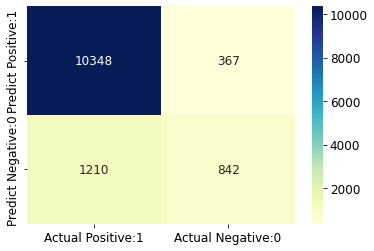

In [582]:
# visualization of confusion matrix 
#cm_matrix=pd.DataFrame(data=cm)

cm_matrix =pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

classification report is another way to evaluate the classification model
it displays the precission ,recall and f1 score 

In [583]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.90      0.97      0.93     10715
         Yes       0.70      0.41      0.52      2052

    accuracy                           0.88     12767
   macro avg       0.80      0.69      0.72     12767
weighted avg       0.86      0.88      0.86     12767



In [584]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

 as we kmow we get the model accuracy 0.876 but we can also
get it from accurcy method 
or we can say bhehind the screen how it is calculated 

In [585]:
classification_accuracy=(TP+TN)/float(TP+TN+FN+FP)
print('classification _ACCURACYis:{0:0.4f} '.format(classification_accuracy))

classification _ACCURACYis:0.8765 


# Classification error


In [586]:
classification_error=1-classification_accuracy
classification_error

0.12352157907104255

or we can also do it in a second way 

In [587]:
classification_error=(FN+FP)/float(TP+TN+FN+FP)
classification_error

0.12352157907104253

# Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [588]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9657


# Recall (Sensitivity) or True Positive Rate
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [589]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8953


# Specificity

In [590]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6964


# False Positive Rate

***1-Specificity***

In [591]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.3036


# f1-score
The F1 score is calculated as the harmonic mean of precision and recall, and ranges from 0 to 1, with a higher score indicating better performance. The formula for F1 score is:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In summary, the F1 score provides a single value that captures the balance between precision and recall and can be useful in comparing the performance of different classification models.

# Support
Support is the actual number of frequency of the class in our dataset.




For example, if we have a dataset with 100 samples, where 60 samples belong to class A and 40 samples belong to class B, the support for class A is 60, and the support for class B is 40.

# Roc curve 
Receiver Operating Characteristic Curve

It is a tool to use the measure the performance of a classification problem visually 

***it is used to measuree the performance of the model on diffrent 
thresh hold level ****

Roc curve will be plot between   ***True positive rate and False positive rate ***

**True positive rate (recall or sensitivity): (TP)/(TP+FN)**

***Flase positive rate : (1-specifity)
    specifity=(TN)/(TN+FP)**

IN the ROC curve we will focus on the value of TPR and FPR 
here we take y-axis as TPR and x-aix as FPR 
in this graph we will 


focus on the tpr and fpr  of a single point at diffrent thresh hold levels 


first we will start the threshhold from o where all the points will 
convert into ***either in TP or in FP*** 


after that we will increase the threshhold level by increasing the thresh hold level the value of TP and FP will also change

In [592]:
y_pred1 = logreg.predict_proba(x_test)[:, 1]
# store the predicted probabilities for class 1 - Probability of rain

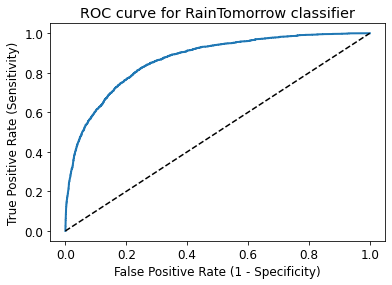

In [593]:
from sklearn.metrics import roc_curve
#Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')


#Plot the ROC curve
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# ROC AUC
ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). **** A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.***

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [594]:
from sklearn.metrics import roc_auc_score
ROC_AUC=roc_auc_score(y_test,y_pred1)
print('ROC AUC= {0:0.4f}'.format(ROC_AUC))

ROC AUC= 0.8674


# Conclusion 

1: AS we know for a classifier model the ROC AUC should be heigher 
    means more the area under the ROC curve more the better model 
    or we can say for perfect classifier ROC AUC equal to 1

2: so our ROC AUC =0.8674 which means our classifer did a good job in predicting that it will RAIN tomorrow or not  

# FINAL CONCLUSION 

1:The logistics regression model accuracy score is 0.8765 
it means our model does a good job in predicting that tomorrow
it will rain or not 

2: Our classsification or logistics reggression model is not showing any over 
    fitting and under fitting 

3: We can see that small number of prediction is saying that it will rain tomorrow 
majority observation predict that there will be no rain tomorrow 

4:With the help of the confusion matrics we can say that 
    number of ture predicted are far more then wrong predicted 
    can also see that Precision ,sensittvity,f1score are in good condition for that model 

5: ROC curve We can see that by increasing the threshold level our accuracy is also increaing we can see with help of the ROC graph 

6:ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.